# Setting up Fastai library

In [3]:
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html -q
!pip install --upgrade kornia -q
!pip install allennlp==1.1.0.rc4 -q
!pip install --upgrade fastai -q

In [67]:
#importing the libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from fastai.tabular.all import *

In [68]:
# Setting the directory structure
path = Path('../input/house-prices-advanced-regression-techniques')
Path.BASE_PATH = path
path.ls()

(#4) [Path('data_description.txt'),Path('sample_submission.csv'),Path('test.csv'),Path('train.csv')]

In [69]:
#importing the data
train = pd.read_csv(path/'train.csv', low_memory=False)
test = pd.read_csv(path/'test.csv', low_memory=False)

In [70]:
train.shape

(1460, 81)

In [71]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [72]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [154]:
#Ordinal Variable
# train['OverallQual']

In [73]:
#dependent variable
dep_var = 'SalePrice'
train[dep_var] = np.log(train[dep_var])

# TabularPandas and TabularProc

In [74]:
proc = [Categorify, FillMissing]

In [75]:
cont, cat = cont_cat_split(train, 1, dep_var=dep_var)

In [76]:
splits = RandomSplitter(0.2)

In [77]:
splits = splits(train)

In [78]:
to = TabularPandas(train, procs=proc, cat_names=cat, cont_names=cont,splits = splits, y_names=dep_var)

In [79]:
len(to.train), len(to.valid)

(1168, 292)

In [80]:
to.show(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
539,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,#na#,MnPrv,Shed,WD,Normal,True,False,False,540,20,69.0,11423,8,5,2001,2002,479.0,1358,0,223,1581,1601,0,0,1601,1,0,2,0,3,1,6,1,2001.0,2,670,180,0,0,0,0,0,2000,5,2010,12.513557
1173,RL,Pave,#na#,IR1,Bnk,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,BLQ,GasA,TA,Y,SBrkr,Ex,Maj1,Gd,#na#,#na#,#na#,#na#,Y,#na#,MnPrv,#na#,WD,Normal,False,False,True,1174,50,138.0,18030,5,6,1946,1994,0.0,152,469,977,1598,1636,971,479,3086,0,0,3,0,3,1,12,1,1980.0,0,0,122,0,0,0,0,0,0,3,2007,12.208570
847,RL,Pave,#na#,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,Plywood,None,TA,TA,CBlock,TA,TA,Av,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Fa,Attchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,848,20,36.0,15523,5,6,1972,1972,0.0,460,0,404,864,864,0,0,864,1,0,1,0,3,1,5,1,1972.0,1,338,0,0,0,0,0,0,0,8,2009,11.801857
1086,RM,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,#na#,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,WD,Normal,True,False,False,1087,160,69.0,1974,4,5,1973,1973,0.0,334,0,212,546,546,546,0,1092,0,0,1,1,3,1,6,0,1973.0,1,286,120,96,0,0,0,0,0,5,2010,11.332602
1185,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,AsbShng,AsbShng,None,TA,Gd,BrkTil,TA,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,#na#,Attchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,1186,50,60.0,9738,5,7,1924,1950,0.0,392,0,392,784,949,272,0,1221,1,0,1,0,4,1,7,0,1965.0,1,392,0,0,236,0,0,0,0,3,2006,11.560762


In [81]:
to.items.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
539,540,20,4,69.0,11423,2,0,4,4,1,...,3,2000,5,2010,9,5,12.513557,2,1,1
1173,1174,50,4,138.0,18030,2,0,1,1,1,...,0,0,3,2007,9,5,12.208570,1,1,2
847,848,20,4,36.0,15523,2,0,1,4,1,...,0,0,8,2009,9,5,11.801857,1,1,1
1086,1087,160,5,69.0,1974,2,0,4,4,1,...,0,0,5,2010,9,5,11.332602,2,1,1
1185,1186,50,4,60.0,9738,2,0,4,4,1,...,0,0,3,2006,9,5,11.560762,1,1,1


# Decision Tree

In [82]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [83]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [84]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [85]:
m_rmse(m, xs, y)

0.0

In [86]:
m_rmse(m, valid_xs, valid_y)

0.18449

In [87]:
m.get_n_leaves(), len(train)

(1128, 1460)

In [91]:
m = DecisionTreeRegressor(min_samples_leaf=10)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.127663, 0.175994)

In [92]:
m.get_n_leaves()

90

# Random Forest

In [101]:
def rf(xs, y, n_estimators=40, max_samples=800,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [102]:
m = rf(xs, y);

In [103]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.109485, 0.141313)

In [104]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [106]:
r_mse(preds.mean(0), valid_y)

0.141313

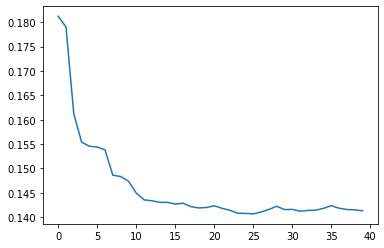

In [107]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [108]:
r_mse(m.oob_prediction_, y)

0.152317

# Tree Variance of predicted Score

In [109]:

preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [110]:
preds.shape

(40, 292)

In [111]:
preds_std = preds.std(0)

In [112]:
preds_std[:5]

array([0.16588331, 0.09336596, 0.13042877, 0.14852591, 0.21835304])

# Feature Importance

In [113]:

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [114]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
50,OverallQual,0.371601
62,GrLivArea,0.167531
52,YearBuilt,0.066127
58,TotalBsmtSF,0.055161
65,FullBath,0.049905
59,1stFlrSF,0.037613
72,GarageCars,0.034059
73,GarageArea,0.031620
18,ExterQual,0.018654
55,BsmtFinSF1,0.016031


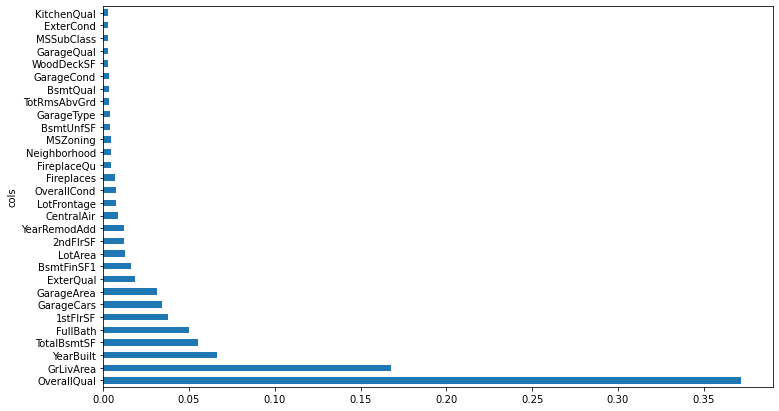

In [115]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

# Remove Low Important variables

In [116]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

17

In [117]:

xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [118]:

m = rf(xs_imp, y)

In [119]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.116128, 0.144174)

In [120]:
len(xs.columns), len(xs_imp.columns)

(83, 17)

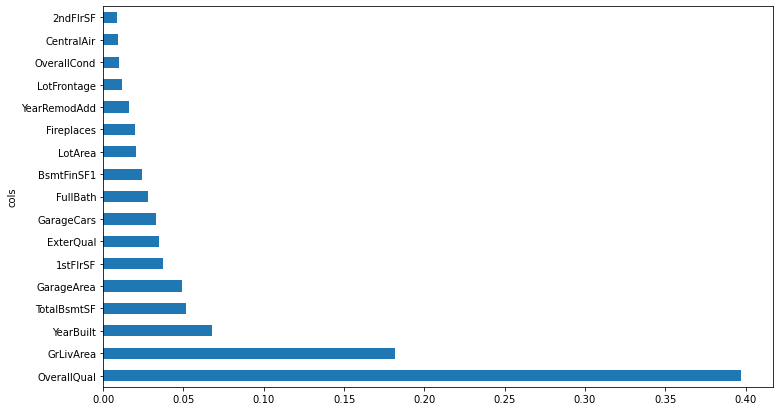

In [121]:
plot_fi(rf_feat_importance(m, xs_imp));

In [126]:
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

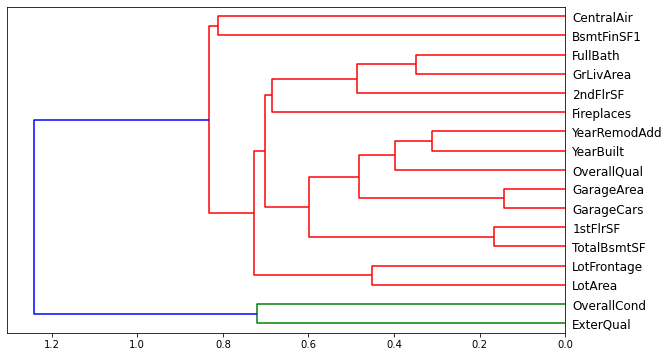

In [127]:
cluster_columns(xs_imp)

# Partial Dependence

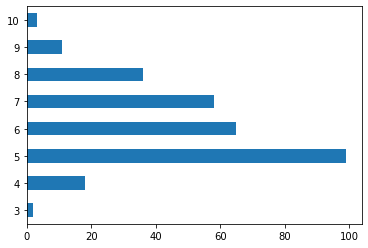

In [156]:
p = valid_xs_imp['OverallQual'].value_counts(sort=False).plot.barh()
# c = to.classes['OverallQual']
# plt.yticks(range(len(c)), c);

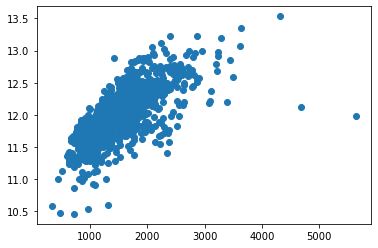

In [138]:
# GrLivArea vs y
plt.scatter(xs_imp['GrLivArea'],y)

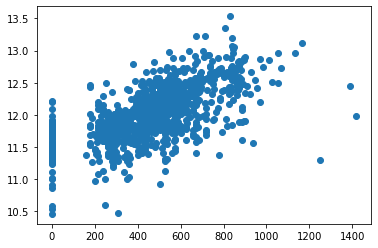

In [140]:
# GarageArea vs y
plt.scatter(xs_imp['GarageArea'],y)

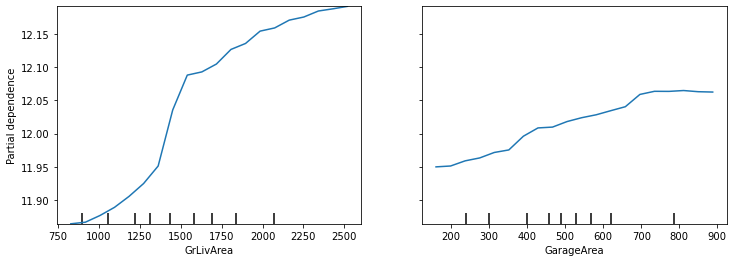

In [143]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_imp, ['GrLivArea','GarageArea'],
                        grid_resolution=20, ax=ax);

# Tree Interpreter

In [162]:
# !pip install treeinterpreter -q
# !pip install waterfallcharts -q

In [163]:
#hide
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [164]:
row = valid_xs_imp.iloc[:5]

In [165]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [166]:

prediction[0], bias[0], contributions[0].sum()

(array([12.72918275]), 12.018405195385217, 0.7107775546833385)

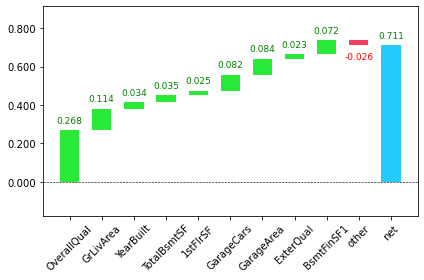

In [167]:
waterfall(valid_xs_imp.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');